#19AIE205 - Python For Machine Learning
# CLassification of Food using Nutritional values
#Kanisettypalli Karthik, Samirit Saha, B Srivathsan (Team 7)
#BL.EN.U4AIE20025, BL.EN.U4AIE20058, BL.EN.U4AIE20006

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from matplotlib.gridspec import GridSpec  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("nutrients.csv")
df["Category"] = df["Category"].replace(to_replace =["Dairy products"], value =0)
df["Category"] = df["Category"].replace(to_replace =["Fats, Oils, Shortenings"], value =1)
df["Category"] = df["Category"].replace(to_replace =["Meat, Poultry"], value =2)
df["Category"] = df["Category"].replace(to_replace =["Fish, Seafood"], value =2)
df["Category"] = df["Category"].replace(to_replace =["Vegetables A-E"], value =3)
df["Category"] = df["Category"].replace(to_replace =["Vegetables F-P"], value =3)
df["Category"] = df["Category"].replace(to_replace =["Vegetables R-Z"], value =3)
df["Category"] = df["Category"].replace(to_replace =["Fruits A-F"], value =4)
df["Category"] = df["Category"].replace(to_replace =["Fruits G-P"], value =4)
df["Category"] = df["Category"].replace(to_replace =["Fruits R-Z"], value =4)
df["Category"] = df["Category"].replace(to_replace =["Breads, cereals, fastfood,grains"], value =5)
df["Category"] = df["Category"].replace(to_replace =["Soups"], value =6)
df["Category"] = df["Category"].replace(to_replace =["Desserts, sweets"], value =7)
df["Category"] = df["Category"].replace(to_replace =["Jams, Jellies"], value =7)
df["Category"] = df["Category"].replace(to_replace =["Seeds and Nuts"], value =5)
df["Category"] = df["Category"].replace(to_replace =["Drinks,Alcohol, Beverages"], value =8)
print(df)
df["Grams"]=pd.to_numeric(df["Grams"])
df["Calories"]=pd.to_numeric(df["Calories"])
x=df.iloc[:,[2,3,4,5,6,7,8]].values
X=x
y= df["Category"].values  
x
print("Y ",y)

                      Food Measure  Grams  Calories  Protein  Fat  Sat.Fat  \
0               Cows' milk   1 qt.    976       660       32   40       36   
1                Milk skim   1 qt.    984       360       36    0        0   
2               Buttermilk   1 cup    246       127        9    5        4   
3    Evaporated, undiluted   1 cup    252       345       16   20       18   
4           Fortified milk  6 cups   1419      1373       89   42       23   
..                     ...     ...    ...       ...      ...  ...      ...   
329    Fruit-flavored soda  12 oz.    346       161        0    0        0   
330             Ginger ale  12 oz.    346       105        0    0        0   
331              Root beer  12 oz.    346       140        0    0        0   
332                 Coffee   1 cup    230         3        0    0        0   
333                    Tea   1 cup    230         4        0    0        0   

     Fiber  Carbs  Category  
0      0.0   48.0         0  
1  

In [3]:
df.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,143.341317,188.724551,8.598802,8.565868,6.419162,2.370090,25.027246,3.745509
std,138.856431,184.527403,17.753758,19.822035,18.493187,16.078785,35.877447,2.079045
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000
50%,108.000000,131.000000,3.000000,1.000000,0.000000,0.200000,14.000000,4.000000
75%,200.000000,250.000000,12.000000,10.000000,7.750000,1.000000,30.750000,5.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000,8.000000


In [8]:
correlations = df.corr(method='pearson')
print(correlations)

             Grams  Calories   Protein       Fat   Sat.Fat     Fiber  \
Grams     1.000000  0.400070  0.218501  0.026726  0.039737  0.059567   
Calories  0.400070  1.000000  0.293519  0.395446  0.318067  0.060725   
Protein   0.218501  0.293519  1.000000  0.733965  0.755171  0.834771   
Fat       0.026726  0.395446  0.733965  1.000000  0.967216  0.726613   
Sat.Fat   0.039737  0.318067  0.755171  0.967216  1.000000  0.794111   
Fiber     0.059567  0.060725  0.834771  0.726613  0.794111  1.000000   
Carbs     0.363045  0.610950  0.389750  0.220703  0.265528  0.450364   
Category -0.036096 -0.069575 -0.298919 -0.257512 -0.225831 -0.075400   

             Carbs  Category  
Grams     0.363045 -0.036096  
Calories  0.610950 -0.069575  
Protein   0.389750 -0.298919  
Fat       0.220703 -0.257512  
Sat.Fat   0.265528 -0.225831  
Fiber     0.450364 -0.075400  
Carbs     1.000000  0.200570  
Category  0.200570  1.000000  


In [7]:
correlations = df.corr(method='pearson')
print(correlations.skew())

Grams       1.712805
Calories    0.728273
Protein    -0.794255
Fat        -0.421350
Sat.Fat    -0.371627
Fiber      -0.244251
Carbs       1.596895
Category    2.117021
dtype: float64


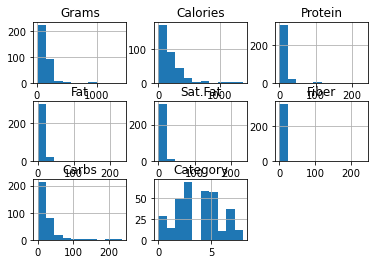

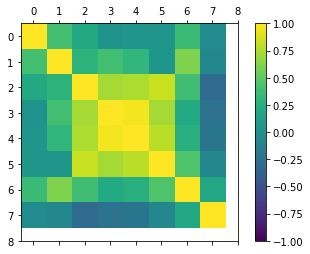

In [17]:
df.hist()
import numpy
correlations = df.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
pyplot.show()

In [12]:
from matplotlib import pyplot
pyplot.show()

In [3]:
ac=[]
ac1=[]
ac2=[]
ac3=[]
ac4=[]
ac5=[]
ac6=[]
pc=[]
pc1=[]
pc2=[]
pc3=[]
pc4=[]
pc5=[]
pc6=[]
rc=[]
rc1=[]
rc2=[]
rc3=[]
rc4=[]
rc5=[]
rc6=[]
size=[0.2,0.25,0.3,0.35,0.4]
for i in range(len(size)):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= size[i], random_state=0)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train,y_train)
    clf = LogisticRegression()
    clf.fit(x_train,y_train)
    naiveclf = GaussianNB()
    naiveclf.fit(x_train,y_train)
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    
    svc_rbf.fit(x_train, y_train)
    clftree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    clftree.fit(x_train, y_train)
    clfforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    clfforest.fit(x_train, y_train)
    
    svc_result=svc_lin.predict(x_test)
    svcrbf_result=svc_rbf.predict(x_test)
    test_result= model.predict(x_test)
    clf_test_result= clf.predict(x_test)
    naiveclf_test_result= naiveclf.predict(x_test)
    clftree_result=clftree.predict(x_test)
    clfforest_result=clfforest.predict(x_test)
    
    ac.append(metrics.accuracy_score(y_test, test_result))
    ac1.append(metrics.accuracy_score(y_test, clf_test_result))
    ac2.append(metrics.accuracy_score(y_test, naiveclf_test_result))
    ac3.append(metrics.accuracy_score(y_test, svc_result))
    ac4.append(metrics.accuracy_score(y_test, svcrbf_result))
    ac5.append(metrics.accuracy_score(y_test, clftree_result))
    ac6.append(metrics.accuracy_score(y_test, clfforest_result))
    pc.append(metrics.precision_score(y_test, test_result,average='macro'))
    pc1.append(metrics.precision_score(y_test, clf_test_result,average='macro'))
    pc2.append(metrics.precision_score(y_test, naiveclf_test_result,average='macro'))
    pc3.append(metrics.precision_score(y_test, svc_result,average='macro'))
    pc4.append(metrics.precision_score(y_test, svcrbf_result,average='macro'))
    pc5.append(metrics.precision_score(y_test, clftree_result,average='macro'))
    pc6.append(metrics.precision_score(y_test, clfforest_result,average='macro'))
    rc.append(metrics.recall_score(y_test, test_result,average='macro'))
    rc1.append(metrics.recall_score(y_test, clf_test_result,average='macro'))
    rc2.append(metrics.recall_score(y_test, naiveclf_test_result,average='macro'))
    rc3.append(metrics.recall_score(y_test, svc_result,average='macro'))
    rc4.append(metrics.recall_score(y_test, svcrbf_result,average='macro'))
    rc5.append(metrics.recall_score(y_test, clftree_result,average='macro'))
    rc6.append(metrics.recall_score(y_test, clfforest_result,average='macro'))

Max Accuracy of KNN 0.5671641791044776
Max Accuracy of LoRe 0.6268656716417911
Max Accuracy of NB 0.4925373134328358
Max Accuracy of SVCL 0.7014925373134329
Max Accuracy of SVCRBF 0.38461538461538464
Max Accuracy of Decision Tree 0.6837606837606838
Max Accuracy of Random Forest 0.7164179104477612


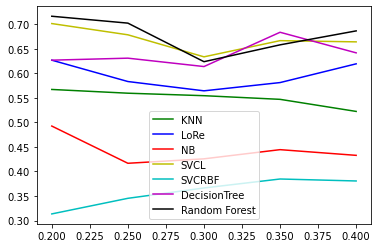

In [4]:
print("Max Accuracy of KNN",max(ac))
print("Max Accuracy of LoRe",max(ac1))
print("Max Accuracy of NB",max(ac2))
print("Max Accuracy of SVCL",max(ac3))
print("Max Accuracy of SVCRBF",max(ac4))
print("Max Accuracy of Decision Tree",max(ac5))
print("Max Accuracy of Random Forest",max(ac6))
plt.plot(size,ac,'g',label='KNN')
plt.plot(size,ac1,'b',label='LoRe')
plt.plot(size,ac2,'r',label='NB')
plt.plot(size,ac3,'y',label='SVCL')
plt.plot(size,ac4,'c',label='SVCRBF')
plt.plot(size,ac5,'m',label='DecisionTree')
plt.plot(size,ac6,'k',label='Random Forest')
plt.legend()
plt.show()

Max Precision Score of KNN 0.47366487205668484
Max Precision Score of LoRe 0.6172839506172839
Max Precision Score of NB 0.5764814814814815
Max Precision Score of SVC 0.6661616161616162
Max Precision Score of SVCRBF 0.2357456140350877
Max Precision Score of Decision Tree 0.6751632786115545
Max Precision Score of Random Forest 0.7300282347065973


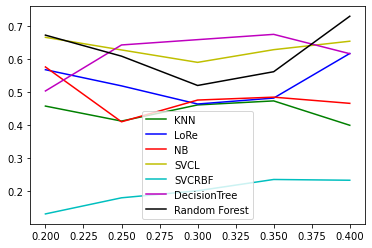

In [5]:
print("Max Precision Score of KNN",max(pc))
print("Max Precision Score of LoRe",max(pc1))
print("Max Precision Score of NB",max(pc2))
print("Max Precision Score of SVC",max(pc3))
print("Max Precision Score of SVCRBF",max(pc4))
print("Max Precision Score of Decision Tree",max(pc5))
print("Max Precision Score of Random Forest",max(pc6))
plt.plot(size,pc,'g',label='KNN')
plt.plot(size,pc1,'b',label='LoRe')
plt.plot(size,pc2,'r',label='NB')
plt.plot(size,pc3,'y',label='SVCL')
plt.plot(size,pc4,'c',label='SVCRBF')
plt.plot(size,pc5,'m',label='DecisionTree')
plt.plot(size,pc6,'k',label='Random Forest')
plt.legend()
plt.show()

Max Recall Score of KNN 0.47873931623931626
Max Recall Score of LoRe 0.5970191865993965
Max Recall Score of NB 0.5430595638928972
Max Recall Score of SVC 0.7124406457739793
Max Recall Score of SVCRBF 0.25122078484651583
Max Recall Score of Decision Tree 0.6644761454702974
Max Recall Score of Random Forest 0.6510088972607713


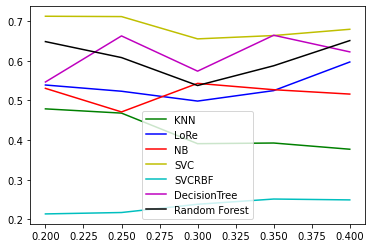

In [6]:
print("Max Recall Score of KNN",max(rc))
print("Max Recall Score of LoRe",max(rc1))
print("Max Recall Score of NB",max(rc2))
print("Max Recall Score of SVC",max(rc3))
print("Max Recall Score of SVCRBF",max(rc4))
print("Max Recall Score of Decision Tree",max(rc5))
print("Max Recall Score of Random Forest",max(rc6))
plt.plot(size,rc,'g',label='KNN')
plt.plot(size,rc1,'b',label='LoRe')
plt.plot(size,rc2,'r',label='NB')
plt.plot(size,rc3,'y',label='SVC')
plt.plot(size,rc4,'c',label='SVCRBF')
plt.plot(size,rc5,'m',label='DecisionTree')
plt.plot(size,rc6,'k',label='Random Forest')
plt.legend()
plt.show()

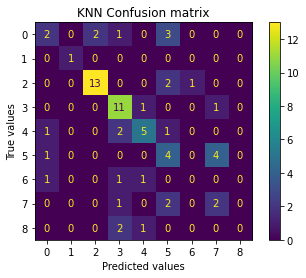

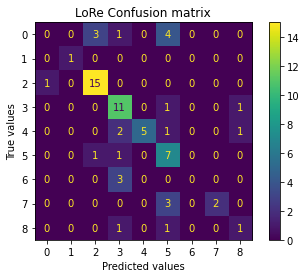

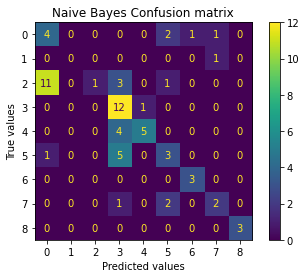

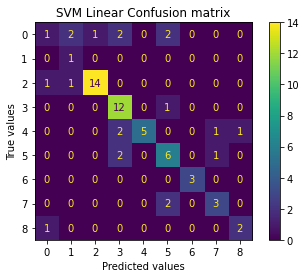

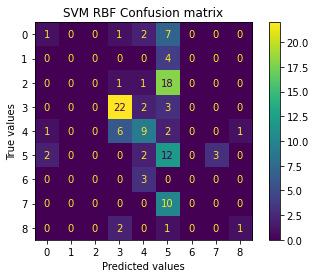

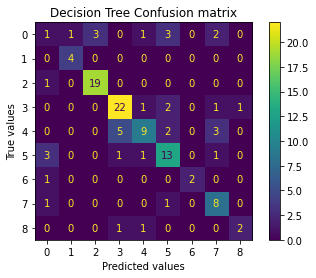

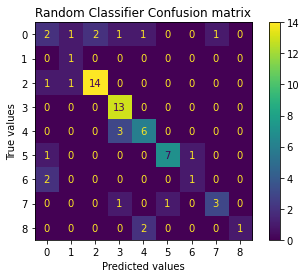

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= size[0], random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
test_result= model.predict(x_test)
cm= metrics.confusion_matrix(y_test, test_result)
cmd_obj = metrics.ConfusionMatrixDisplay(cm)
cmd_obj.plot()
cmd_obj.ax_.set(
                title='KNN Confusion matrix', 
                xlabel='Predicted values', 
                ylabel='True values')


clf = LogisticRegression()
clf.fit(x_train,y_train)
clf_test_result= clf.predict(x_test)
cm_clf= metrics.confusion_matrix(y_test, clf_test_result)
cmd1_obj = metrics.ConfusionMatrixDisplay(cm_clf)
cmd1_obj.plot()
cmd1_obj.ax_.set(
                title='LoRe Confusion matrix', 
                xlabel='Predicted values', 
                ylabel='True values')


naiveclf = GaussianNB()
naiveclf.fit(x_train,y_train)
naiveclf_test_result= naiveclf.predict(x_test)
cm_naiveclf= metrics.confusion_matrix(y_test, naiveclf_test_result)
cmd2_obj = metrics.ConfusionMatrixDisplay(cm_naiveclf)
cmd2_obj.plot()
cmd2_obj.ax_.set(
                title='Naive Bayes Confusion matrix', 
                xlabel='Predicted values', 
                ylabel='True values')

svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(x_train, y_train)
svc_result=svc_lin.predict(x_test)
cm_SVC= metrics.confusion_matrix(y_test, svc_result)
cmd3_obj = metrics.ConfusionMatrixDisplay(cm_SVC)
cmd3_obj.plot()
cmd3_obj.ax_.set(
                title='SVM Linear Confusion matrix', 
                xlabel='Predicted values', 
                ylabel='True values')

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= size[3], random_state=0)
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(x_train, y_train)
svcrbf_result=svc_rbf.predict(x_test)
cm_SVCRBF= metrics.confusion_matrix(y_test, svcrbf_result)
cmd4_obj = metrics.ConfusionMatrixDisplay(cm_SVCRBF)
cmd4_obj.plot()
cmd4_obj.ax_.set(
                title='SVM RBF Confusion matrix', 
                xlabel='Predicted values', 
                ylabel='True values')

clftree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clftree.fit(x_train, y_train)
clftree_result=clftree.predict(x_test)
cm_DT= metrics.confusion_matrix(y_test, clftree_result)
cmd5_obj = metrics.ConfusionMatrixDisplay(cm_DT)
cmd5_obj.plot()
cmd5_obj.ax_.set(
                title='Decision Tree Confusion matrix', 
                xlabel='Predicted values', 
                ylabel='True values')

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= size[0], random_state=0)
clfforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clfforest.fit(x_train, y_train)
clfforest_result=clfforest.predict(x_test)
cm_RF= metrics.confusion_matrix(y_test, clfforest_result)
cmd6_obj = metrics.ConfusionMatrixDisplay(cm_RF)
cmd6_obj.plot()
cmd6_obj.ax_.set(
                title='Random Classifier Confusion matrix', 
                xlabel='Predicted values', 
                ylabel='True values')
plt.show()

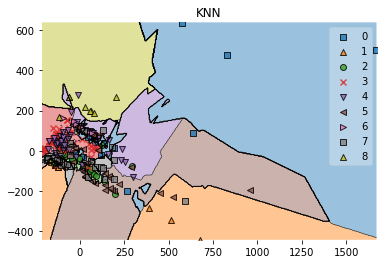

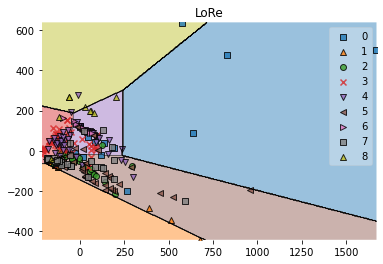

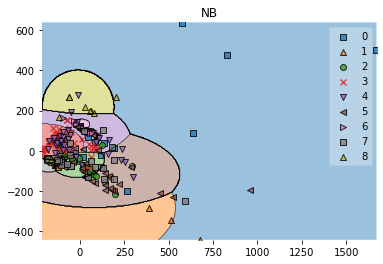

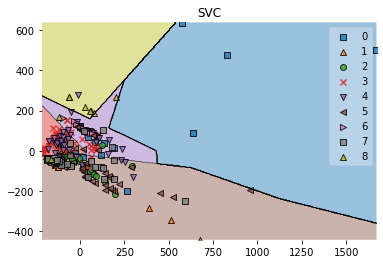

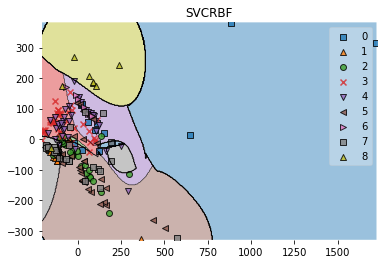

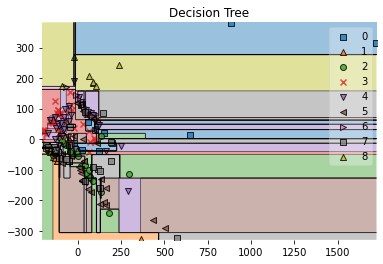

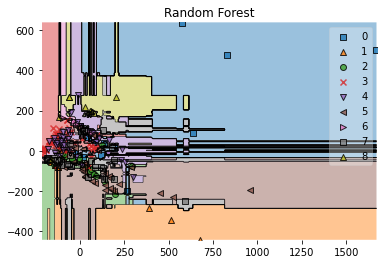

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= size[0], random_state=0)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
gs =GridSpec(1, 1)
value=1.5
width=0.75
pca = PCA(n_components = 2)
x = pca.fit_transform(x_train)
knn.fit(x, y_train)
ax = plt.subplot(gs[0, 0])
plot_decision_regions(x, y_train, knn)
plt.title("KNN")
plt.show()
LoRe = LogisticRegression()
gs =GridSpec(1, 1)
value=1.5
width=0.75
pca = PCA(n_components = 2)
x = pca.fit_transform(x_train)
LoRe.fit(x, y_train)
ax = plt.subplot(gs[0, 0])
plot_decision_regions(x, y_train, LoRe)
plt.title("LoRe")
plt.show()
NB = GaussianNB()
gs =GridSpec(1, 1)
value=1.5
width=0.75
pca = PCA(n_components = 2)
x = pca.fit_transform(x_train)
NB.fit(x, y_train)
ax = plt.subplot(gs[0, 0])
plot_decision_regions(x, y_train, NB)
plt.title("NB")
plt.show()
svc_lin = SVC(kernel = 'linear', random_state = 0)
gs =GridSpec(1, 1)
value=1.5
width=0.75
pca = PCA(n_components = 2)
x = pca.fit_transform(x_train)
svc_lin.fit(x, y_train)
ax = plt.subplot(gs[0, 0])
plot_decision_regions(x, y_train, svc_lin)
plt.title("SVC")
plt.show()
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= size[3], random_state=0)
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
gs =GridSpec(1, 1)
value=1.5
width=0.75
pca = PCA(n_components = 2)
x = pca.fit_transform(x_train)
svc_rbf.fit(x, y_train)
ax = plt.subplot(gs[0, 0])
plot_decision_regions(x, y_train, svc_rbf)
plt.title("SVCRBF")
plt.show()
clftree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
gs =GridSpec(1, 1)
value=1.5
width=0.75
pca = PCA(n_components = 2)
x = pca.fit_transform(x_train)
clftree.fit(x, y_train)
ax = plt.subplot(gs[0, 0])
plot_decision_regions(x, y_train, clftree)
plt.title("Decision Tree")
plt.show()
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= size[0], random_state=0)
clfforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
gs =GridSpec(1, 1)
value=1.5
width=0.75
pca = PCA(n_components = 2)
x = pca.fit_transform(x_train)
clfforest.fit(x, y_train)
ax = plt.subplot(gs[0, 0])
plot_decision_regions(x, y_train, clfforest)
plt.title("Random Forest")
plt.show()